In [298]:
import numpy as np
import math
from scipy.stats import norm

from __future__ import division
%precision 10


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [241]:
def sample_mean(N, p=0.5):
    T = np.count_nonzero(np.random.rand(N) > p)
    return T/N
def stdev(N, orig_stdev):
    return orig_stdev/ math.sqrt(N)


def zscore(N, m):
    return abs(m - 0.5)/(0.5/math.sqrt(N))

In [242]:
def exper(N, p=0.5):
    m = sample_mean(N, p)
    z = zscore(N, m)
    return (m, 1.0 - norm.cdf(z))

In [324]:
exper(10, 0.5)[1]

0.1029516054

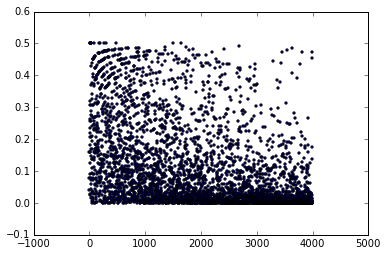

In [351]:
xs = list(range(1, 4000))
ys = [exper(x, 0.52)[1] for x in xs]
plt.scatter(xs, ys, marker=".")

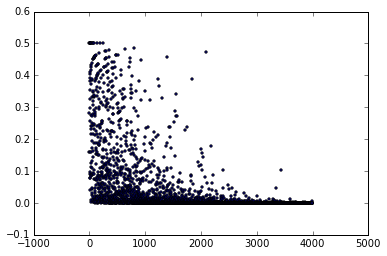

In [345]:
xs = list(range(1, 4000))
ys = [exper(x, 0.54)[1] for x in xs]
plt.scatter(xs, ys, marker=".")

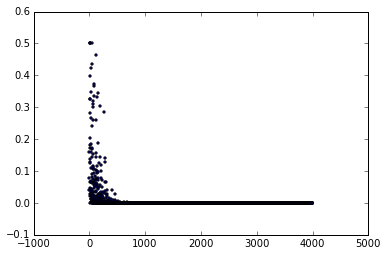

In [346]:
xs = list(range(1, 4000))
ys = [exper(x, 0.60)[1] for x in xs]
plt.scatter(xs, ys, marker=".")

In [48]:
a = np.array([1, 0])
mu, sig = a.mean(), a.std()


In [296]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [354]:
np.array([1,2,3])

array([1, 2, 3])

In [373]:
a = pd.Series([1,2,3], index=[1,2,3])
b = pd.Series([1,2,4], index=[0,1,2])

In [371]:
a

1    1
2    2
2    3
dtype: int64

In [372]:
a.add(b, fill_value=0)

0    1.0
1    3.0
2    6.0
2    7.0
dtype: float64

In [369]:
pd.Series?

In [375]:
a[[1,2]]

1    1
2    2
dtype: int64

In [390]:
df= pd.DataFrame({ 'nas': ['huylo', 'buylo', 'huylo'], 'a': [1, 2, 3], 'b': [1, 4, 9]})

In [391]:
df

,a,b,nas
0,1,1,huylo
1,2,4,buylo
2,3,9,huylo


In [379]:
type(df['a'])

pandas.core.series.Series

In [383]:
df.loc[1:2]

,a,b
1,2,4
2,3,9


In [387]:
df[['a', 'b']]

,a,b
0,1,1
1,2,4
2,3,9


In [394]:
xg = df.groupby('nas').sum()

In [395]:
xg.columns

Index([u'a', u'b'], dtype='object')

In [396]:
xg.index

Index([u'buylo', u'huylo'], dtype='object', name=u'nas')

In [397]:
xg

,a,b
nas,,
buylo,2,4
huylo,4,10


In [411]:
#df.groupby('nas')['a'].agg({'list':(lambda x: len(list(x)))})
#df.groupby('nas')['a'].agg({'list':(lambda x: ', '.join( [str(y) for y in x] )) })
df.groupby('nas')['a'].agg({'list':(lambda x: str(type(x)))})

,list
nas,
buylo,<class 'pandas.core.series.Series'>
huylo,<class 'pandas.core.series.Series'>


In [438]:
def f(r, d):
#     print (r)
#     print(type(r))
    return pd.Series([r['a'] + d, r['b']], index=['feat_a', 'feat_b'])

In [448]:
pd.concat([df, df.apply(f, axis=1, reduce=True, args=(3,))], axis=1)

,a,b,nas,feat_a,feat_b
0,1,1,huylo,4,1
1,2,4,buylo,5,4
2,3,9,huylo,6,9


In [437]:
df.

,a,b,nas
0,1,1,huylo
1,2,4,buylo
2,3,9,huylo


In [420]:
df.apply

In [419]:
a.map?